# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy.linalg as LA # Import Linear Algebra module from NumPy
from numpy.linalg import inv
from numpy.linalg import norm

Obtain the data file

In [2]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !wget "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"

File already exists
File is readable


In [3]:
import pandas as pd

# Load the dataset using Pandas
data = pd.read_csv('50_Startups.csv')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
features = data.iloc[:, :-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
labels = data.iloc[:, 3].values

df = pd.DataFrame(data)

In [4]:
labels

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

***Play with data***

In [5]:
df.shape

(50, 5)

In [6]:
df.replace(to_replace = 0.00, value = df.mean(axis=0), inplace=True)  # inject the mean of the column when value is 0
df.head()

<ipython-input-6-84577155662a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.replace(to_replace = 0.00, value = df.mean(axis=0), inplace=True)  # inject the mean of the column when value is 0


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 **`df.replace()` function:**
   - This function is used to replace specific values within a DataFrame (`df`) with another value.
   - The parameters used are:
     - `to_replace=0.00`: This specifies the value in the DataFrame that needs to be replaced, in this case, `0.00`.
     - `value=df.mean(axis=0)`: This sets the replacement value for the matched condition. Here, `df.mean(axis=0)` calculates the mean for each column along the rows (axis=0) of the DataFrame `df`. The mean value for each column will replace the `0.00` values.
     - `inplace=True`: This parameter ensures that the modification is done directly on the original DataFrame (`df`) without creating a new DataFrame. If `inplace` is set to `True`, the original DataFrame is modified.

***Select two categories for binary classification***

In [7]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [8]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [9]:
df_sel.dtypes # type of each column

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data***

One-hot encoding of categorical feature _State_

One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:
- If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
  - "red" becomes [1, 0, 0]
  - "green" becomes [0, 1, 0]
  - "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [10]:
df_one = pd.get_dummies(df_sel["State"])

In [11]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [12]:
# construct the final dataset that you will use for learning and prediction
df_fin = pd.concat((df_one, df_sel), axis=1) # axis=1 concatenates along the columns
df_fin = df_fin.drop(["Florida"], axis=1) # drops specifice columns by specifying name
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


In [13]:
# Constructing the final dataset for learning and prediction

# Concatenating two DataFrames 'df_one' and 'df_sel' along columns (axis=1)
df_fin = pd.concat((df_one, df_sel), axis=1)

# Dropping the column "Florida" from the dataset as it was not selected for the final model
df_fin = df_fin.drop(["Florida"], axis=1)

# Dropping the column "State" (assumed to be the original 'State' column) as it is not required in its original form
df_fin = df_fin.drop(["State"], axis=1)

# Renaming the column "California" to "State" as part of preparing the dataset for classification (1 for California, 0 for Florida)
df_fin = df_fin.rename(columns={"California": "State"})

# Displaying the initial rows of the modified final dataset
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [14]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [15]:
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

In [16]:
# Apply the 'absolute_maximum_scale' function to each column in the DataFrame 'df_fin'
for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [17]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


In [18]:
df_fin.shape

(33, 5)

***Classification***

Prepare the dataset:

In [19]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [20]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.
np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


Train the Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.
np.random.seed(0)

LR = LogisticRegression(random_state=0, solver='lbfgs', penalty=None).fit(X_train, y_train)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)


In [23]:
accuracy

0.2222

In [24]:
predictions

array([0., 1., 0., 1., 0., 0., 0., 0., 1.])

***Plot results***

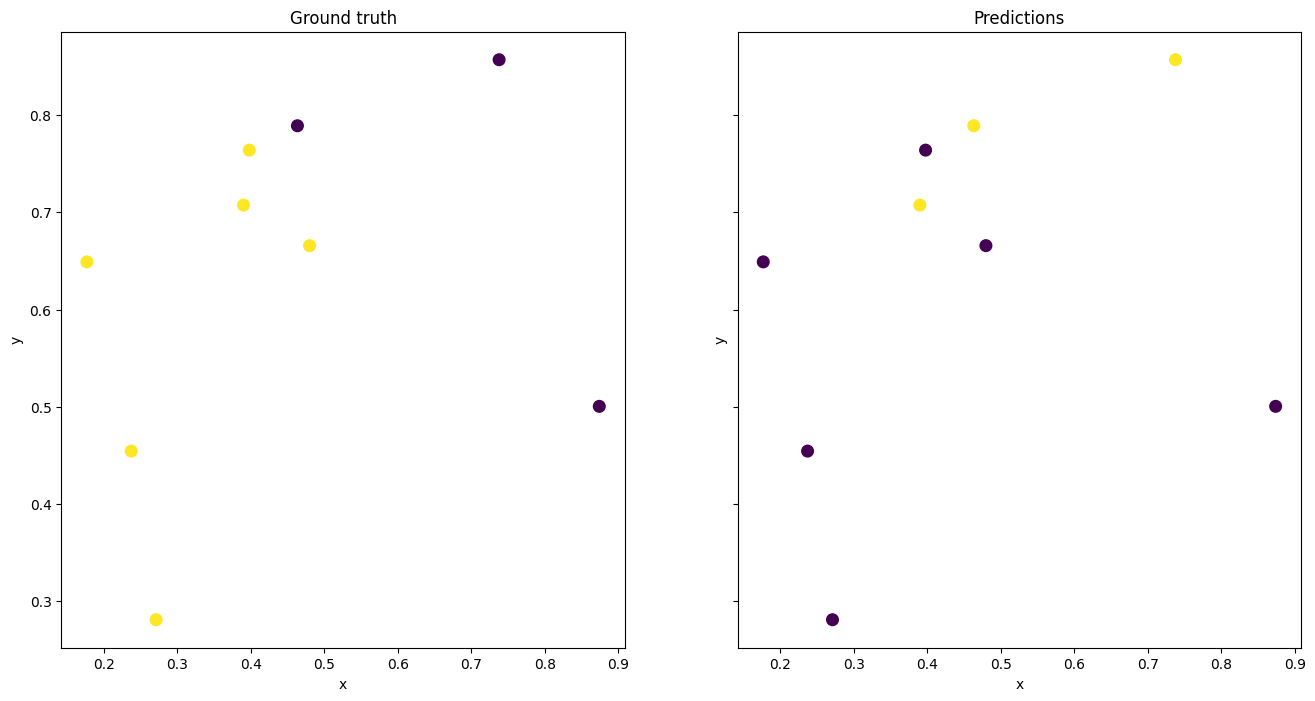

In [25]:
# plot the results

fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True, figsize=(16, 8))

ax1.scatter(X_test[:,0], X_test[:,1], c=y_test, s=70)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("Ground truth")


ax2.scatter(X_test[:,0], X_test[:,1], c=predictions, s=70)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Predictions")

# Show the plot
fig.show()

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

In [26]:
def sigmoidM(X, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    y = 1/(1+np.exp(-np.matmul(X,w)))
    return y

def LogisticLoss(X, labels, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0] # numero di righe in X
    cost = -(1/n)*np.sum(labels*np.log(sigmoidM(X,w)) + (1-labels)*np.log(1-sigmoidM(X,w)))
    return cost


**Gradient descent**


In [27]:
def GDLogistic(X, labels, iter, gamma):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    """
    d = np.shape(X)  # d contains the shape of X, which is a tuple (n, d)
    cost = np.zeros(iter)  # Create an array to store the cost at each iteration
    w = np.random.uniform(0, 0.01, d[1])  # Initialize w with random values
    W = np.zeros((d[1], iter))  # Create an array to store the weight vectors at each iteration

    for i in range(iter):
        W[:, i] = w  # Store the current weight vector in the W array
        # Update the weight vector using gradient descent
        w = w - (2 * gamma / d[0]) * (np.transpose(X) @ (sigmoidM(X, w) - labels))
        # Compute and store the logistic loss for the current weight vector
        cost[i] = LogisticLoss(X, labels, w)

    return W, cost

In [28]:
# usage example
iter = 1000
gamma = 0.001
wgdG, L_G = GDLogistic(X_train, y_train, iter, gamma)
wpredG= wgdG[:,-1]

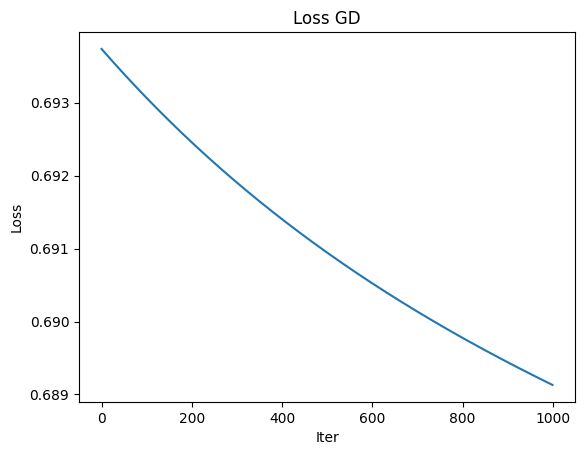

In [29]:
plt.plot(L_G)
plt.title('Loss GD')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

**Ridge**

In [30]:
def LogRegGradient(X_train, y_train, W_train):
    """
    Parameters
    ----------
    X_train: array of float dim n x d
        Matrix containing the dataset
    y_train: array of float of dim n
        Vector representing the ground truth label of each data point (0 or 1)
    W_train : array of float of dim d
        Weights of the logistic regression model
    """
         # W_train pesi calcolati
    return (sigmoidM(X_train, W_train) - y_train)@X_train

In [31]:
def RidgeLogisticLoss(X, labels, w, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    labels : array of float of dim n
        Vector representing the ground truth label of each data point (0 or 1)
    w : array of float of dim d
        Weights of the logistic regression model
    lam : float
        Weight of the L2 penalty term
    """

    return LogisticLoss(X, labels, w) + lam*norm(w,2)

def RidgeGradient(w, lam):
    return 2*lam*w

In [32]:
def GDRidge(X, y, iter, gamma, points, d, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    points : int
        Number of points in our dataset
    d : int
        Dimensionality of each data point in the dataset
    lam : float
        Weight of the L2 penalty term
    """
    W = np.zeros((d, iter))  # Array to store weights at each iteration
    L = np.zeros(iter)       # Array to store loss values at each iteration
    w = np.zeros(d)          # Initialize weights with zeros

    for i in range(iter):
        W[:, i] = w  # Store the current weights in the W array
        # Update weights using gradient descent with both sigmoidM and Ridge components
        w = w - gamma * (LogRegGradient(X, y, w) + RidgeGradient(w, lam))
        # Calculate and store the current loss value with Ridge regularization
        L[i] = RidgeLogisticLoss(X, y, w, lam)

    return W, L


In [33]:
d = np.shape(X)[1]
iter = 1000
points = np.shape(X)[0]
gamma = 0.001
lam = 0.001

w = np.random.normal(0, 1, d)

wgdR, L_R = GDRidge(X_train, y_train, iter, gamma, points, d, lam)
wpredR = wgdR[:,-1]

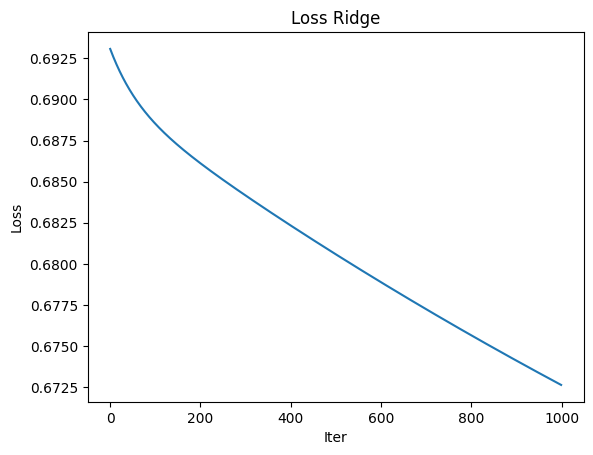

In [34]:
plt.plot(L_R)
plt.title('Loss Ridge')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

**LASSO**

In [35]:
def LassoLogisticLoss(X, y, w, lam):
    """
    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset
    y : array of float of dim n
        Vector containing the ground truth value of each data point
    w : array of float of dim d
        Weights of the fitted line
    lam : float
        Weight of the L1 penalty term
    """
    return LogisticLoss(X, y, w) + lam*LA.norm(w,1)

In [36]:
def L1_subgradient(z):
    """
    Compute the subgradient of the absolute value function element-wise.

    Parameters:
    ----------
    z : array-like
        Input array for which the subgradient is calculated.

    Returns:
    ----------
    g : array-like
        Subgradient of the absolute value function applied element-wise to `z`.
    """
    # Create an array g of the same shape as z, initialized with all 1s.
    g = np.ones(z.shape)

    # Check each element of z.
    for i in range(z.shape[0]):
    # If the element is negative, set the corresponding element in g to -1.
       if z[i] < 0.:
          g[i] = -1.0
    # If the element is zero, set the corresponding element in g to 0.
       elif z[i] == 0.:
         g[i] = 0.0


    # Return the resulting array g, representing the subgradient.
    return g

def LassoGradient(w, lam):
    return lam * L1_subgradient(w)

In [37]:
def GDLasso(X, y, iter, gamma, points, d, lam):
    """
    Perform Gradient Descent for Lasso (L1-regularized) Logistic Regression.

    Parameters:
    ----------
    X : array-like, shape (n, d)
        Matrix containing the dataset.
    y : array-like, shape (n,)
        Vector containing the ground truth values of each data point.
    iter : int
        Number of GD iterations.
    gamma : float
        Learning rate.
    points : int
        Number of points in the dataset.
    d : int
        Dimensionality of each data point in the dataset.
    lam : float
        Weight of the L1 penalty term.

    Returns:
    ----------
    W : array-like, shape (d, iter)
        Matrix to store weights at each iteration.
    L : array-like, shape (iter,)
        Array to store loss values at each iteration.
    """
    # Initialize arrays to store weights and loss values.
    W = np.zeros((d, iter))
    L = np.zeros(iter)

    # Initialize weights with random values.
    w = np.random.normal(0, 0.1, d)

    # Perform gradient descent iterations.
    for i in range(iter):
        # Store the current weight vector in the W matrix.
        W[:, i] = w

        # Update the weight vector using the gradient of Lasso (L1-regularized) loss.
        w = w - gamma * (LogRegGradient(X, y, w) + LassoGradient(w, lam))

        # Calculate and store the loss value for this iteration.
        L[i] = LassoLogisticLoss(X, y, w, lam)

    # Return the matrix of weight vectors and the array of loss values.
    return W, L

In [38]:
d = np.shape(X_test)[1]
iter = 1000
points = np.shape(X_test)[0]
gamma = 0.001
lam = 0.01

wgdL, L_L = GDLasso(X_train, y_train, iter, gamma, points, d, lam)
wpredL = wgdL[:,-1]

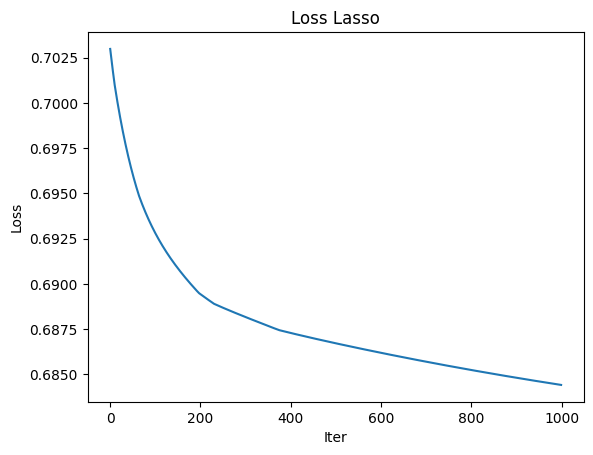

In [39]:
plt.plot(L_L)
plt.title('Loss Lasso')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

**Elastic Net**

In [40]:
# Elastic Net Loss Function
def ElasticNetSquareLoss(X, y, w, lr, l):
    """
    Calculate the Elastic Net loss for logistic regression.

    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset.
    y : array of float of dim n
        Vector containing the ground truth value of each data point.
    w : array of float of dim d
        Weights of the fitted line.
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization).
    l : float
        Regularization strength parameter.

    Returns
    -------
    loss : float
        Elastic Net loss.
    """
    return LogisticLoss(X, y, w) + lr * l * LA.norm(w, 1) + (1 - lr) * l * LA.norm(w, 2)

# Elastic Net Gradient Function
def ElasticNetGradient(X, y, w, lr, l, points):
    """
    Calculate the gradient for Elastic Net regularization.

    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset.
    y : array of float of dim n
        Vector containing the ground truth value of each data point.
    w : array of float of dim d
        Weights of the fitted line.
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization).
    l : float
        Regularization strength parameter.
    points : int
        Number of data points.

    Returns
    -------
    gradient : array of float of dim d
        Gradient of the Elastic Net regularization term.
    """
    return LogRegGradient(X, y, w) + (1 - lr) * RidgeGradient(w, l) + lr * LassoGradient(w, l)

# Gradient Descent with Elastic Net Regularization
def GDElasticNet(X, y, lr, l, iter, gamma):
    """
    Perform Gradient Descent with Elastic Net regularization for logistic regression.

    Parameters
    ----------
    X : array of float dim n x d
        Matrix containing the dataset.
    y : array of float of dim n
        Vector containing the ground truth value of each data point.
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization).
    l : float
        Regularization strength parameter.
    iter : int
        Number of GD iterations.
    gamma : float
        Learning rate.

    Returns
    -------
    W : array of float of dim d x iter
        Weight vectors at each iteration.
    L : array of float of dim iter
        Loss values at each iteration.
    """
    points = X.shape[0]
    d = X.shape[1]
    W = np.zeros((d, iter))
    L = np.zeros(iter)
    w = np.random.normal(0, 0.1, d)
    for i in range(iter):
        W[:, i] = w
        w = w - gamma * ElasticNetGradient(X, y, w, lr, l, points)
        L[i] = ElasticNetSquareLoss(X, y, w, lr, l)
    return W, L


In [69]:
iter = 1000
gamma = 0.001
lam = 0.001
lr = 0.5

wgdE, L_E = GDElasticNet(X_train, y_train, lr, lam, iter, gamma)
wpredE = wgdL[:,-1]

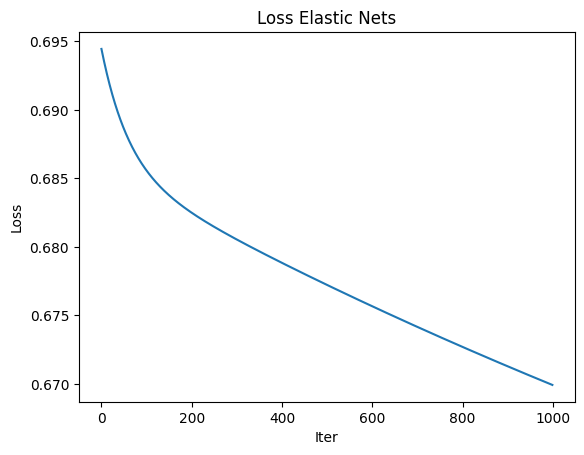

In [70]:
plt.plot(L_E)
plt.title('Loss Elastic Nets')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [43]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)

target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.17      0.33      0.22         3
     Florida       0.33      0.17      0.22         6

    accuracy                           0.22         9
   macro avg       0.25      0.25      0.22         9
weighted avg       0.28      0.22      0.22         9



In [44]:
# function to print the classification report
def printClassRep(y, prediction):
    target_names = ['California', 'Florida']
    print(classification_report(y, prediction, target_names=target_names))

In [45]:
# function to calculatye the predicted values of a logistic regression model
def predict_val(X, W, alpha):
    return (sigmoidM(X_test, W)>=alpha).astype(int)

Repeat the previous task for regularized logistic regression and compare the results.

In [52]:
printClassRep(y_test, predict_val(X_test, wpredG, 0.5))
printClassRep(y_test, predict_val(X_test, wpredR, 0.5))
printClassRep(y_test, predict_val(X_test, wpredL, 0.5))
printClassRep(y_test, predict_val(X_test, wpredE, 0.5))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9

              precision    recall  f1-score   support

  California       0.38      1.00      0.55         3
     Florida       1.00      0.17      0.29         6

    accuracy                           0.44         9
   macro avg       0.69      0.58      0.42         9
weighted avg       0.79      0.44      0.37         9

              precision    recall  f1-score   support

  California       0.38      1.00      0.55         3
     Florida       1.00      0.17      0.29         6

    accuracy                           0.44         9
   macro avg       0.69      0.58      0.42         9
weighted avg       0.79      0.44      0.37         9

              preci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

In [58]:
def roc_curve_manual(y_true, y_scores, plot=True):
    """
    Calculate and optionally plot the ROC curve manually.

    Parameters:
    - y_true: array-like, true binary labels (0 or 1).
    - y_scores: array-like, predicted probabilities for the positive class.
    - plot: bool, whether to plot the ROC curve or not.

    Returns:
    - None (plots the curve)
    """

    # Sort the scores and true labels in descending order of scores
    sorted_indices = np.argsort(y_scores)[::-1]
    sorted_scores = y_scores[sorted_indices]
    sorted_labels = y_true[sorted_indices]

    # Initialize arrays to store true positive rates (tpr) and false positive rates (fpr)
    tpr = [0]
    fpr = [0]

    # Initialize counters for true positives (tp) and false positives (fp)
    tp = 0
    fp = 0

    # Total number of positive instances in the data
    total_positives = np.sum(sorted_labels)

    # Iterate through sorted scores and update tp, fp, tpr, and fpr
    for label in sorted_labels:
        if label == 1:
            tp += 1
        else:
            fp += 1
        tpr.append(tp / total_positives)
        fpr.append(fp / (len(y_true) - total_positives))

    tpr.append(1)
    fpr.append(1)

    # Calculate thresholds (midpoints between consecutive scores)
    thresholds = 0.5 * (sorted_scores[1:] + sorted_scores[:-1])

    # Calculate AUC using trapezoidal rule
    auc_value = np.trapz(tpr, fpr)

    if plot:
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()



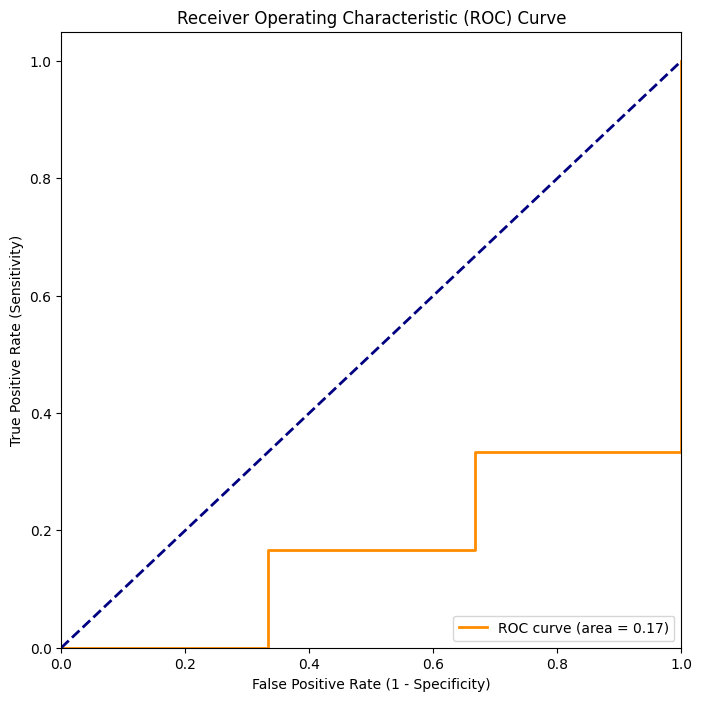

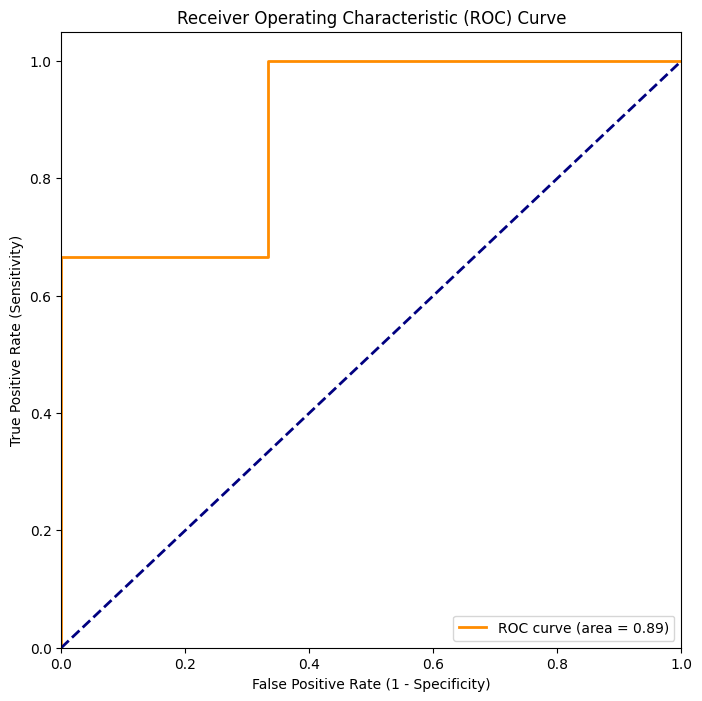

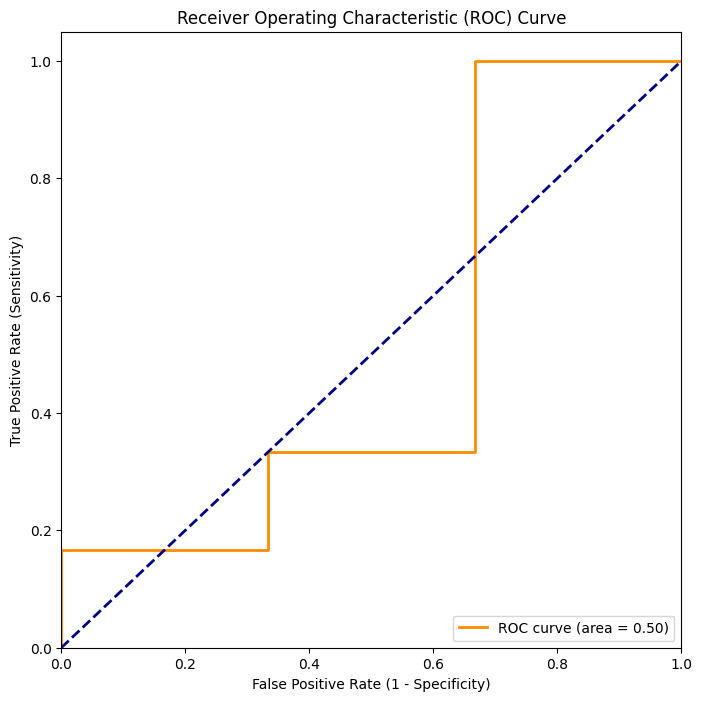

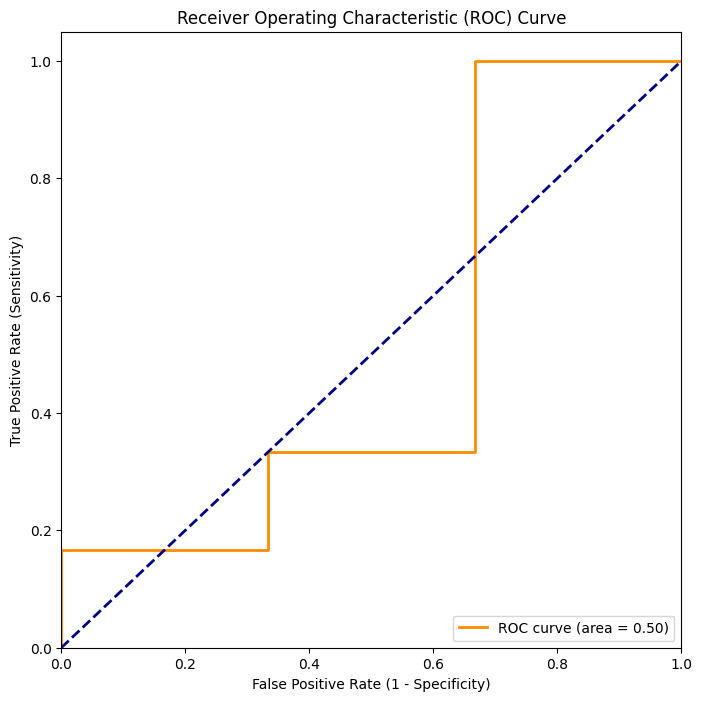

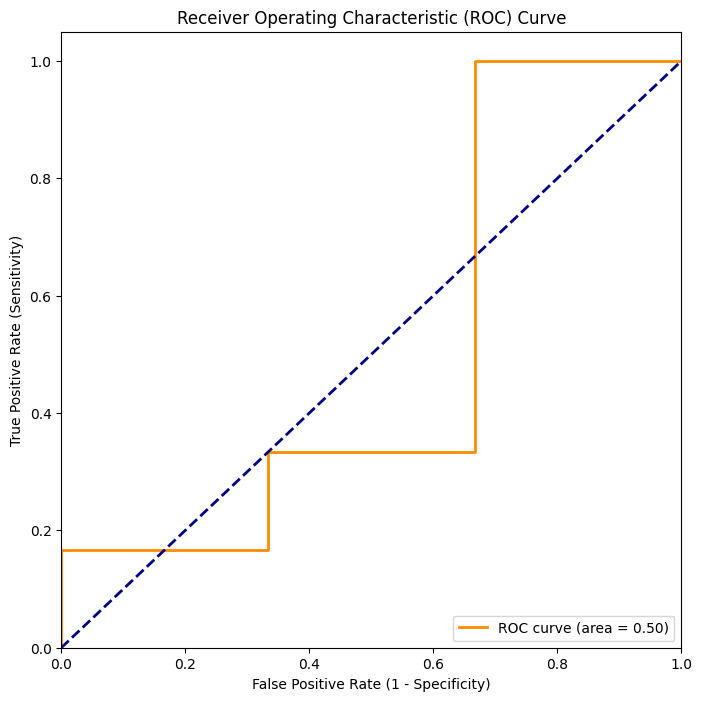

In [59]:
# plotting the ROC curve for every model we defined

y_true = y_test
y_scores = sigmoidM(X_test, LR.coef_[0])
roc_curve_manual(y_true, y_scores)

y_scores = sigmoidM(X_test, wpredG)
roc_curve_manual(y_true, y_scores)

y_scores = sigmoidM(X_test, wpredR)
roc_curve_manual(y_true, y_scores)

y_scores = sigmoidM(X_test, wpredL)
roc_curve_manual(y_true, y_scores)

y_scores = sigmoidM(X_test, wpredE)
roc_curve_manual(y_true, y_scores)
